# Data Modelling:

### 1. Load Train and Test dataset:

In [2]:
import pickle as pkl

with open("train.pkl", "rb") as f:
    X_train, y_train = pkl.load(f)

with open("test.pkl", "rb") as f:
    X_test, y_test = pkl.load(f)

### 2. Modelling the Train and Test Split:

#### 2.1. Training Different Classifiers for Classification:

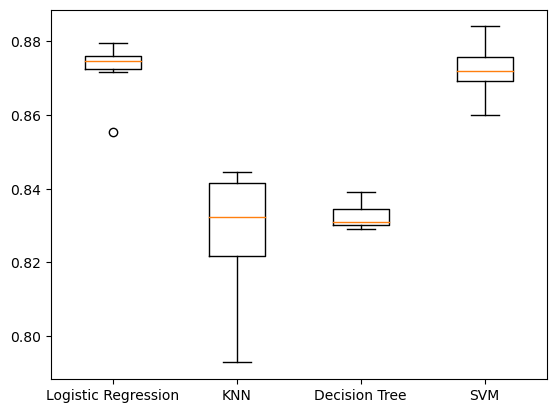

In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

models = {"Logistic Regression": LogisticRegression(solver = 'newton-cg', max_iter = 500, C = 1000),
          "KNN": KNeighborsClassifier(),
          "Decision Tree": DecisionTreeClassifier(),
          "SVM": SVC(gamma='auto')
          }

results = []

for model in models.values():
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kf)
    results.append(cv_results)


plt.boxplot(results, labels= models.keys())
plt.show()



#### 2.2. Check the Performance Metrics:

In [9]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

for name, model in models.items():
    model.fit(X_train, y_train)
    test_score = model.score(X_test, y_test)
    prediction = model.predict(X_test)
    report = classification_report(prediction, y_test)
    mat = confusion_matrix(prediction, y_test)
    print("{} Test Set Accuracy: {}".format(name, test_score))
    print("{} Confusion Matrix: {}".format(name, mat))
    print("{} Classification Report: {}".format(name, report))

Logistic Regression Test Set Accuracy: 0.8848086586780054
Logistic Regression Confusion Matrix: [[1150  154]
 [ 144 1139]]
Logistic Regression Classification Report:               precision    recall  f1-score   support

           0       0.89      0.88      0.89      1304
           1       0.88      0.89      0.88      1283

    accuracy                           0.88      2587
   macro avg       0.88      0.88      0.88      2587
weighted avg       0.88      0.88      0.88      2587

KNN Test Set Accuracy: 0.8353304986470815
KNN Confusion Matrix: [[ 995  127]
 [ 299 1166]]
KNN Classification Report:               precision    recall  f1-score   support

           0       0.77      0.89      0.82      1122
           1       0.90      0.80      0.85      1465

    accuracy                           0.84      2587
   macro avg       0.84      0.84      0.83      2587
weighted avg       0.84      0.84      0.84      2587

Decision Tree Test Set Accuracy: 0.8388094317742559
Decision T

From the Boxplot and the Accuracy score above, we see that Logistic model and Support Vector Machine has performed most consistently. So, in our modelling part we will consider Logistic Regression Model and SVM classifiers as our best predictor.

#### 2.3. Plot the ROC Curve:

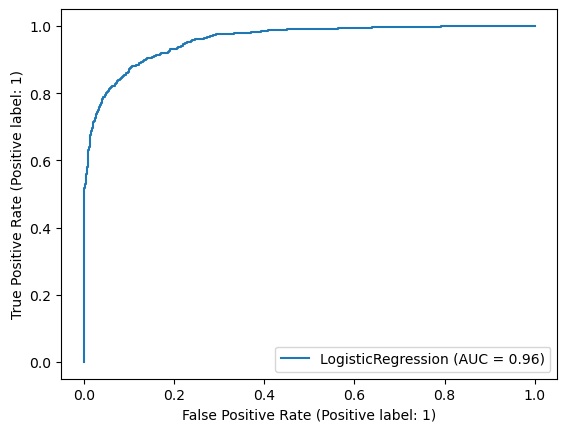

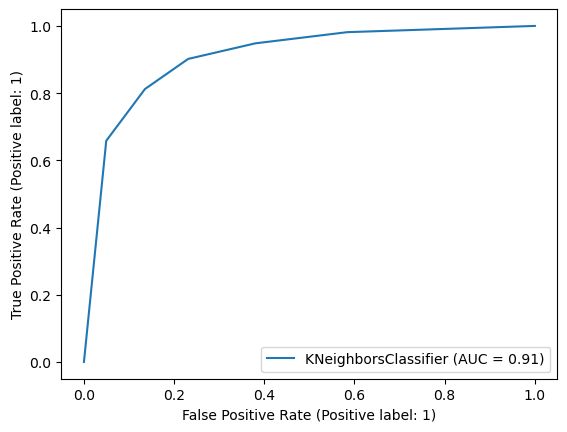

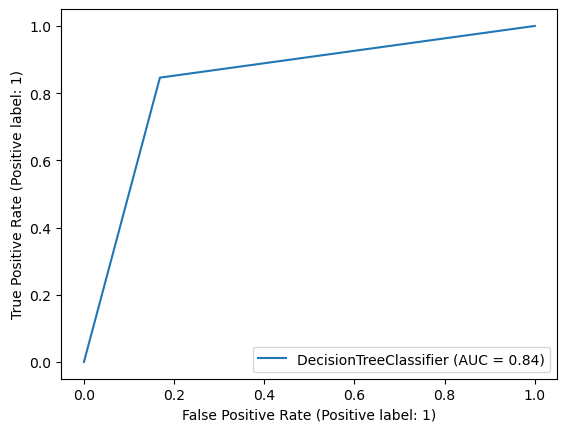

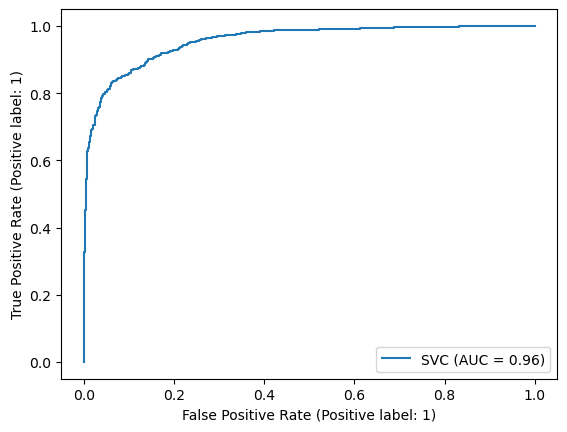

In [11]:
from sklearn.metrics import RocCurveDisplay

for model in models.values():
    RocCurveDisplay.from_estimator(model, X_test, y_test)
    plt.show()